In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#time series
import datetime
import time
from statsmodels.tsa.seasonal import seasonal_decompose
import requests

import sklearn
from sklearn.decomposition import FactorAnalysis
import sklearn.datasets
from factor_analyzer import FactorAnalyzer


complete_df = pd.read_csv("DataSets/Complete_Data.csv")
%matplotlib inline

# Factor Analysis

* Factor Analysis is an exploratory data analysis method used to search influential underlying factors or latent variables from a set of observed variables.<br>
* It helps in data interpretations by reducing the number of variables. <br>
* It extracts maximum common variance from all variables and puts them into a common score.

# Assumptions of Factor Analysis
* There are no outliers in data. <br>
=> we have a few but not that much! <br><br>
* Sample size should be greater than the factor.<br>
=> Sample is 20k, factor is 5 so True<br><br>
* There should not be perfect multicollinearity.<br>
=> Accomodates had the highest correlation of numeric val of 0.35 so True<br><br>
* There should not be homoscedasticity between the variables.<br>
=>True, not all variables have same variance!
<br><br>

Thus we can use factor analysis<br><br>

# Step-By-Step
1 Factoranal DataFrame
* As factor analysis can only be done with ordinal/numeric values, we transformed all ordinal variables into integers (1..2..3 etc)
* In the factoranal dataframe we thus dropped categorical nominal variables
2 Scree plot
* Via the scree plot we can see the amount of factors needed (5) => based on the EIGENVALUE > 1 RULE

<br><br>
2 Fit Model
* We made the factor analysis model fit on our factoranal data frame via scikitlearn
<br><br>
3 Interpret Results
* The variables in factor 1 are indicating price/size of a room!!!.
* guests_included basically means: how many guests are included for the booking fee -> basically indicating how many guests there are (accomodates) -> inidicating size room -> indicating prize
<br>
We somehow missed that accomodates and guests_included mean the same thing, thus via this pca we will remove guests_included since it had the least amount of loading

<br><br>
3 Conclusions
*  we find that the total amount of variance explained by our 5 factors is 0.37%
* this means that 45% of the variables explain 37% of the variance (note that this is pretty good since there is a lot of error aswell) 
<br>However since we only have 11 variables anyways, we think that only dropping the 'duplicate' variable "guests_included" will be enough.<br>
<br>this way our models still have a lot of variance to work with


In [2]:
#we create 
factoranal_df = complete_df[["minimum_nights","number_of_reviews","calculated_host_listings_count","availability_365","host_since","accommodates","amenities","guests_included","maximum_nights","cancellation_policy","price"]]

In [3]:
factoranal_df

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,host_since,accommodates,amenities,guests_included,maximum_nights,cancellation_policy,price
0,3,248,1,44,1,2,0,1,15,4,59
1,4,42,1,47,1,5,0,2,20,2,160
2,1,233,2,198,1,2,1,2,1000,4,80
3,14,1,2,141,1,3,1,2,60,4,125
4,2,171,1,199,1,2,1,1,730,4,150
...,...,...,...,...,...,...,...,...,...,...,...
20025,7,0,1,11,1,4,1,1,12,4,340
20026,3,0,2,16,1,3,1,1,14,1,150
20027,10,0,2,210,3,2,1,1,22,2,80
20028,2,0,2,31,1,2,1,1,15,1,55


In [4]:
fa = FactorAnalyzer(n_factors=5, rotation="varimax") #p
fa.fit(factoranal_df)
#get the loadings
loadings = fa.loadings_
#get he eigenvectors and eigenvalues
ev, v = fa.get_eigenvalues()
#scree plot
xvalues = range(1,factoranal_df.shape[1]+1)

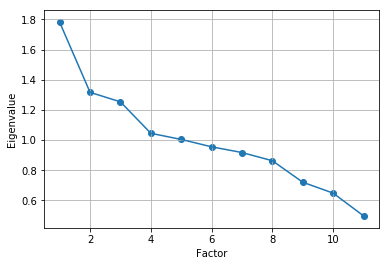

In [5]:
plt.scatter(xvalues,ev)
plt.plot(xvalues,ev)
plt.title=("Scree Plot")
plt.xlabel("Factor")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()
#eigenvalue bigger than 1 rule
#or elbow method both gives 4-5 factors 

In [12]:
factorloadings = pd.DataFrame.from_records(loadings)
#factorloadings

In [13]:
#choose factorloadings > 0.3 
df = pd.DataFrame({'variable': [ "minimum_nights","number_of_reviews","calculated_host_listings_count","availability_365","host_since","accommodates","amenities","guests_included","maximum_nights","cancellation_policy","price"]})
factorloadings =factorloadings[factorloadings>0.3]
factorloadings["variable"] = df
factorloadings.set_index('variable')

,0,1,2,3,4
variable,,,,,
minimum_nights,NaN,NaN,NaN,NaN,NaN
number_of_reviews,NaN,NaN,NaN,NaN,NaN
calculated_host_listings_count,NaN,NaN,0.978024,NaN,NaN
availability_365,NaN,0.988304,NaN,NaN,NaN
host_since,NaN,NaN,NaN,NaN,NaN
accommodates,0.959199,NaN,NaN,NaN,NaN
amenities,NaN,NaN,NaN,NaN,NaN
guests_included,0.459584,NaN,NaN,NaN,NaN
maximum_nights,NaN,NaN,NaN,NaN,NaN


# Factors
<t> Factor 1:
   * accomodates
   * guests_included
   * price
   <br><br>
Factor 2:
   * availability
   <br>
   <br>
   Factor 3:
   * calculated_host_listings_count
   <br><br>
   Factor 4:
   * cancellation policy
   <br><Br>
   Factor 5:
   * nothing is bigger than 0.3 -> implies that there are only 4 factors
   <br>
   
 The variables in factor 1 are indicating price/size of a room!!!. <br>
 We can conclude that however price is our dependent variable. <br><br>
 We didn't think that we needed to remove this variable at first, but after the PCA it makes sense to remove this var because it basically indicates how many people are included in the hotel (acoomodations)
 
 accomodates and guests included could 

In [18]:
#column [2][4] describes the total var explained by the factor analyses 5 factors
cumulative_var_5_factor= pd.DataFrame(fa.get_factor_variance())
cumulative_var_5_factor

,0,1,2,3,4
0,1.271874,1.068989,1.023021,0.372339,0.285193
1,0.115625,0.097181,0.093002,0.033849,0.025927
2,0.115625,0.212806,0.305808,0.339657,0.365583


In [19]:
#total amount of variance explained by the 5 factprs
cumulative_var_5_factor.iloc[2][4]

0.36558332890659445